# **Health Insurance Charge Analysis**

In this project, I performed data analysis on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)|
|charges| Annual Insurance charges in USD | float|

### Objectives:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models.

In [4]:
# importing necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

**IMPORTING THE DATASET**

In [5]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [6]:
df = pd.read_csv(filepath, header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520


In [8]:
# Adding the headers to the dataframe

headers = ["age", "gender", "bmi", "no-of-children", "smoker", "region", "charges"]
df.columns = headers

In [9]:
df.head(6)

,age,gender,bmi,no-of-children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,?,4,3756.62160


In [10]:
# Replacing the '?' entries with 'NaN' values

df.replace("?", np.nan, inplace=True)
df.head(6)

,age,gender,bmi,no-of-children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,2,33.770,1,0,4,1725.55230
2,28,2,33.000,3,0,4,4449.46200
3,33,2,22.705,0,0,1,21984.47061
4,32,2,28.880,0,0,1,3866.85520
5,31,1,25.740,0,NaN,4,3756.62160


**DATA WRANGLING**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no-of-children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [12]:
# Getting the average of 'age'

mean_age = df["age"].astype('float').mean(axis=0)
print(mean_age)

39.10982658959538


In [13]:
# Replacing missing values with the mean

df["age"].replace(np.nan, mean_age, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no-of-children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


/tmp/ipython-input-13-2749189464.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].replace(np.nan, mean_age, inplace=True)


In [14]:
# Getting the most frequent value of 'smoker'

is_smoker = df["smoker"].value_counts().idxmax()
print(is_smoker)

0


In [15]:
# Replacing missing values with the most frequent value

df['smoker'].replace(np.nan, is_smoker, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no-of-children  2772 non-null   int64  
 4   smoker          2772 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


/tmp/ipython-input-15-3430124521.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['smoker'].replace(np.nan, is_smoker, inplace=True)


In [16]:
# Updating the data types of 'age' and 'smoker'

df['age'] = df['age'].astype('int')
df['smoker'] = df['smoker'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no-of-children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB


In [17]:
# Round 'charges' to the nearest 2 decimal places

df['charges'] = np.round(df[['charges']], 2)
df.head()

,age,gender,bmi,no-of-children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92
1,18,2,33.770,1,0,4,1725.55
2,28,2,33.000,3,0,4,4449.46
3,33,2,22.705,0,0,1,21984.47
4,32,2,28.880,0,0,1,3866.86


**Explanatory Data Analysis (EDA)**

(0.0, 66902.85800000001)

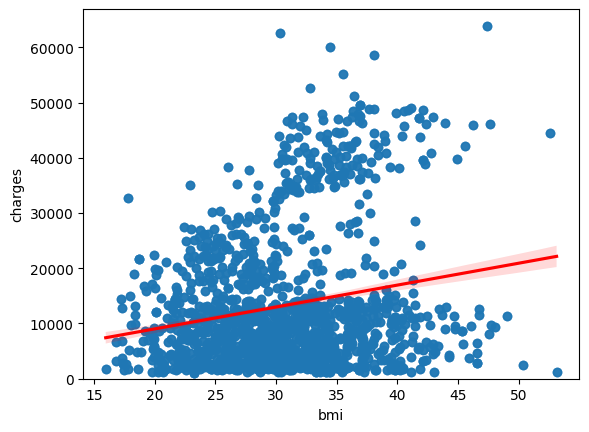

In [18]:
# Implementing the regression plot for `charges` with respect to `bmi`

sns.regplot(x="bmi", y="charges", data=df, line_kws={"color":"red"})
plt.ylim(0,)

<Axes: xlabel='smoker', ylabel='charges'>

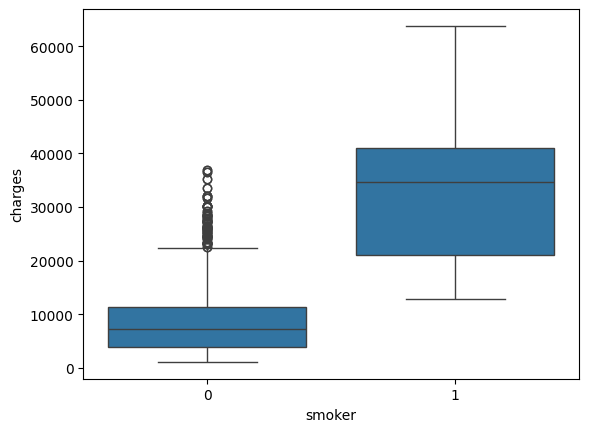

In [19]:
# Implementing the box plot for `charges` with respect to `smoker`

sns.boxplot(x="smoker", y="charges", data=df)

In [20]:
# Printing the correlation matrix for the dataset

print(df.corr())

                     age    gender       bmi  no-of-children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no-of-children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no-of-children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


**MODEL DEVELOPMENT**

In [21]:
# Fitting a linear regression model that may be used to predict the 'charges' value, just by using the 'smoker' attribute of the dataset

X = df[['smoker']]
Y = df[['charges']]
lm = LinearRegression()
lm.fit(X, Y)
print(lm.score(X, Y))

0.6221791733924185


In [22]:
# Using all other attributes to predict the 'charges' value

Z = df[['smoker','age','bmi','no-of-children','region']]
Y = df[['charges']]
lm = LinearRegression()
lm.fit(Z, Y)
print(lm.score(Z, Y))

0.7504038032968698


In [23]:
# Using StandardScaler(), PolynomialFeatures(), and LinearRegression() to create a model that can predict the 'charges'

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z, Y)
ypipe = pipe.predict(Z)
print(r2_score(Y, ypipe))

0.8446359138436712


**MODEL REFINEMENT**

In [24]:
# Splitting the data into training and testing subsets

x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)

In [25]:
# Apply Ridge regressor

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test, yhat))

0.6765758057373698


In [26]:
# Apply polynomial transformation

pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.7829781561930365
